In [102]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import preprocessing

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

In [103]:
# Read in training and dev data sets
train = pd.read_csv('../train_dev_data/modern_train.csv', index_col=0)
dev = pd.read_csv('../train_dev_data/dev_data.csv')

In [104]:
# Define function to replicate rows with specific values, in a specific column
# This will allow us to boost the signal associated with underrepresented labels
def repeat_rows(df, vals, boost=2, column='country_destination'):
    new_df = df
    for val in vals:
        for i in range(boost):
            is_value = df[column] == val
            df_try = df[is_value]
            new_df = new_df.append([df_try],ignore_index=True)
    return new_df.sample(frac=1).reset_index(drop=True)

# train_bias = train
vals = ['AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NL', 'PT',
       'other']
train = repeat_rows(train, vals, boost=2)


In [105]:
# Split off training labels & dev labels
train_labels = train.country_destination
dev_labels = dev.country_destination

In [106]:
# Function to parse month from date columns
def parse_month(col):
    start = str(col).find("-")
    if start != -1:
        end = col.find("-", start+1)
        month = col[start+1:end]
        return month
    else:
        return '00'

train["month_created"] = train.date_account_created.apply(parse_month)
dev["month_created"] = dev.date_account_created.apply(parse_month)
# test["month_created"] = test.date_account_created.apply(parse_month)


# Function to convert months to seasons
def parse_season(col):
    if col in ('12', '01', '02'):
        return 'Winter'
    elif col in ('03', '04', '05'):
        return 'Spring'
    elif col in ('06', '07', '08'):
        return 'Summer'
    else:
        return 'Fall'
    
train["season_created"] = train.month_created.apply(parse_season)
dev["season_created"] = dev.month_created.apply(parse_season)
# test["season_created"] = test.month_created.apply(parse_season)

# Function to parse year from date columns
def parse_year(col):
    stop = str(col).find("-")
    if stop != -1:
        year = col[:stop]
        return year
    else:
        return '0000'

train["year_created"] = train.date_account_created.apply(parse_year)
dev["year_created"] = dev.date_account_created.apply(parse_year)
# test["year_created"] = test.date_account_created.apply(parse_year)

# Function to bin ages
def bin_age(col):
    if col >= 65 and col < 100:
        return "65-100"
    elif col >=45 and col < 65:
        return "45-65"
    elif col >=30 and col < 45:
        return "30-45"
    elif col >= 0 and col < 30:
        return "Under30"
    else:
        return "Unknown"
    
train["bin_age"] = train.age.apply(bin_age)
dev["bin_age"] = train.age.apply(bin_age)
# test["bin_age"] = test.age.appl

# Function to parse month from date columns
def parse_month(col):
    start = str(col).find("-")
    if start != -1:
        end = col.find("-", start+1)
        month = col[start+1:end]
        return month
    else:
        return '00'

train["month_created"] = train.date_account_created.apply(parse_month)
dev["month_created"] = dev.date_account_created.apply(parse_month)
# test["month_created"] = test.date_account_created.apply(parse_month)


# Function to convert months to seasons
def parse_season(col):
    if col in ('12', '01', '02'):
        return 'Winter'
    elif col in ('03', '04', '05'):
        return 'Spring'
    elif col in ('06', '07', '08'):
        return 'Summer'
    else:
        return 'Fall'
    
train["season_created"] = train.month_created.apply(parse_season)
dev["season_created"] = dev.month_created.apply(parse_season)
# test["season_created"] = test.month_created.apply(parse_season)

# Function to parse year from date columns
def parse_year(col):
    stop = str(col).find("-")
    if stop != -1:
        year = col[:stop]
        return year
    else:
        return '0000'

train["year_created"] = train.date_account_created.apply(parse_year)
dev["year_created"] = dev.date_account_created.apply(parse_year)
# test["year_created"] = test.date_account_created.apply(parse_year)

# Function to bin ages
def bin_age(col):
    if col >= 65 and col < 100:
        return "65-100"
    elif col >=45 and col < 65:
        return "45-65"
    elif col >=30 and col < 45:
        return "30-45"
    elif col >= 0 and col < 30:
        return "Under30"
    else:
        return "Unknown"
    
train["bin_age"] = train.age.apply(bin_age)
dev["bin_age"] = train.age.apply(bin_age)
# test["bin_age"] = test.age.apply(bin_age)

# Function to bin languages, leaving only those with a frequency >= 100 in the training data.
# All others will be labeled as 'other'
def bin_lang(col):
    if col in ('en', 'zh', 'es', 'fr'):
        return col
    else:
        return 'other'

train["bin_lang"] = train.language.apply(bin_lang)
dev["bin_lang"] = dev.language.apply(bin_lang)
# test["bin_lang"] = test.language.apply(bin_lang)y(bin_age)

# Function to bin languages, leaving only those with a frequency >= 100 in the training data.
# All others will be labeled as 'other'
def bin_lang(col):
    if col in ('en', 'zh', 'es', 'fr'):
        return col
    else:
        return 'other'

train["bin_lang"] = train.language.apply(bin_lang)
dev["bin_lang"] = dev.language.apply(bin_lang)
# test["bin_lang"] = test.language.apply(bin_lang)

In [107]:
list(train.columns)

['user_id',
 'date_account_created',
 'timestamp_first_active',
 'gender',
 'age',
 'signup_method',
 'signup_flow',
 'language',
 'affiliate_channel',
 'affiliate_provider',
 'first_affiliate_tracked',
 'signup_app',
 'first_device_type',
 'first_browser',
 'country_destination',
 'number_visits',
 'number_devices',
 'longest_session',
 'total_time_on_site',
 'action_detail',
 'first_hour',
 'month_created',
 'season_created',
 'year_created',
 'bin_age',
 'bin_lang']

In [108]:
# Define a function that will encode columns for decision tree
def label_encode(df, cols):
    le = preprocessing.LabelEncoder()
    for elem in cols:
        df[[elem]] = le.fit_transform(df[[elem]]) 
    return df


# Include every column
cols = ['age', 'month_created', 'gender','signup_method', 'signup_flow', 'first_device_type', 
        'first_browser', 'affiliate_channel']

# Label encode our training & dev data for input to decision tree
dt_train = train[cols]
label_encode(dt_train, cols)

dt_dev = dev[cols]
label_encode(dt_dev, cols)

# Preprocess train & dev labels for decision tree
le = preprocessing.LabelEncoder()
dt_train_labels = le.fit_transform(train_labels)
dt_dev_labels = le.fit_transform(dev_labels)

/Users/melaniecostello/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


PREDICTING ON DEV DATA:
Best score is 0.629 with sample size of 1000
Number of unique features predicted: 5


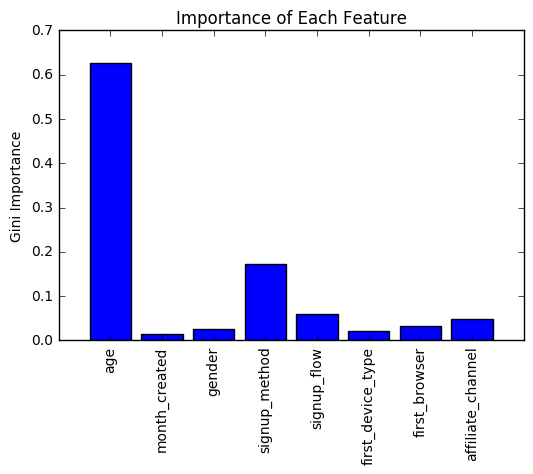

In [112]:
sample_sizes = [25, 50, 75, 100, 250, 300, 400, 500, 750, 1000]
scores = []
max_score = [0, 0]
important_feat = []
num_unique = []
for elem in sample_sizes:
    
    # Fit decision tree model
    dt = DecisionTreeClassifier(criterion="gini", min_samples_split=elem, random_state=99)
    dt.fit(dt_train, dt_train_labels)
    
    # Predict with decision tree
    preds = dt.predict(dt_dev)
    if elem == 1000:
        pred_values_nodesplit500 = preds
        dt_dev_labels_nodeplit500 = dt_dev_labels
    
    # Catalog the unique values & scores predicted for each sample size
    unique = pd.Series(preds).unique()
    num_unique.append(len(unique))
    score = dt.score(dt_dev, dt_dev_labels)
    scores.append(score)
    
    # Track the max score & what sample size was used, as well as
    # the feature importances for the best score
    if score > max_score[1]:
        max_score = [elem, score]
        important_feat = dt.feature_importances_ 
        unique_feat = len(unique)

# Output best score
print "PREDICTING ON DEV DATA:"
print "Best score is %.3f with sample size of %d" % (max_score[1], max_score[0])
print "Number of unique features predicted: %d" % unique_feat

# Create plot to show degree of importance for each feature
num_labels = [c for c in range(len(cols))]
labels = cols
plt.bar(num_labels, important_feat, align='center')
plt.xticks(num_labels, labels, rotation='vertical')
plt.ylabel('Gini Importance')
plt.title("Importance of Each Feature")
plt.show()



Building testing confusion matrix...


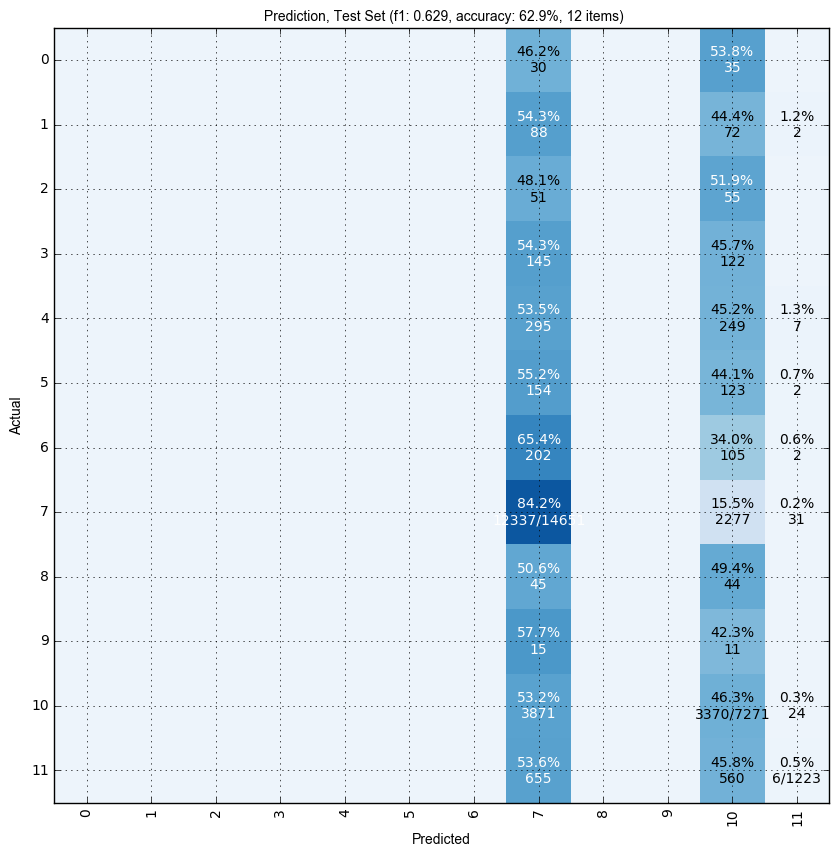

In [113]:
import numpy as np, pylab as pl
# get overall accuracy and F1 score to print at top of plot
pscore = metrics.accuracy_score(dt_dev_labels_nodeplit500, pred_values_nodesplit500)
#score = metrics.f1_score(y_test, pred, pos_label=list(set(y_test)))
# get size of the full label set
unique_pred_values_nodesplit500 = np.unique(pred_values_nodesplit500)
unique_dev_labels = np.unique(dt_dev_labels_nodeplit500)
dur = len(unique_dev_labels)
print "Building testing confusion matrix..."
# initialize score matrices
trueScores = np.zeros(shape=(dur,dur))
predScores = np.zeros(shape=(dur,dur))
# populate totals
for i in xrange(len(dt_dev_labels_nodeplit500)-1):
  trueIdx = dt_dev_labels_nodeplit500[i]
  predIdx = pred_values_nodesplit500[i]
  trueScores[trueIdx,trueIdx] += 1
  predScores[trueIdx,predIdx] += 1
# create %-based results
trueSums = np.sum(trueScores,axis=0)
conf = np.zeros(shape=predScores.shape)
for i in xrange(len(predScores)):
  for j in xrange(dur):
    conf[i,j] = predScores[i,j] / trueSums[i]
# plot the confusion matrix
hq = pl.figure(figsize=(10,10));
aq = hq.add_subplot(1,1,1)
aq.set_aspect(1)
res = aq.imshow(conf,cmap=pl.get_cmap('Blues'),interpolation='nearest',vmin=-0.05,vmax=1.)
width = len(conf)
height = len(conf[0])
done = []
# label each grid cell with the misclassification rates
for w in xrange(width):
  for h in xrange(height):
      pval = conf[w][h]
      c = 'k'
      rais = w
      if pval > 0.5: c = 'w'
      if pval > 0.001:
        if w == h:
          aq.annotate("{0:1.1f}%\n{1:1.0f}/{2:1.0f}".format(pval*100.,predScores[w][h],trueSums[w]), xy=(h, w), 
                  horizontalalignment='center',
                  verticalalignment='center',color=c,size=10)
        else:
          aq.annotate("{0:1.1f}%\n{1:1.0f}".format(pval*100.,predScores[w][h]), xy=(h, w), 
                  horizontalalignment='center',
                  verticalalignment='center',color=c,size=10)
# label the axes
pl.xticks(range(width), unique_dev_labels[:width],rotation=90,size=10)
pl.yticks(range(height), unique_dev_labels[:height],size=10)
# add a title with the F1 score and accuracy
aq.set_title(" Prediction, Test Set (f1: "+"{0:1.3f}".format(score)+', accuracy: '+'{0:2.1f}%'.format(100*pscore)+", " + str(len(unique_dev_labels)) + " items)",fontname='Arial',size=10,color='k')
aq.set_ylabel("Actual",fontname='Arial',size=10,color='k')
aq.set_xlabel("Predicted",fontname='Arial',size=10,color='k')
pl.grid(b=True,axis='both')
# save it
pl.savefig("pred.conf.test.png")